# Linear Regression

In this simple day one I will use Linear Regression on famous house price prediction problem where we have to predict the selling price of house by using features like number of bedrooms,AGE,TAX etc. It is toy dataset available with Scikit-learn framework in-built. 

Now let's import some useful functions and frameworks of python. we are going to use scikit-learn's in-built function to train our linear regression model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import *
from sklearn.linear_model import LinearRegression

/home/urvish/.pyenv/versions/3.6.0/envs/general/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
boston=load_boston()
print(boston.data.shape)
print(boston.feature_names)
print(np.max(boston.target),np.min(boston.target),np.mean(boston.target))

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.532806324110677


In [3]:
# Splitting the data into train and test. Here we are not doing validation as we do not have really large dataset.
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,test_size=0.25,random_state=33)

# Now we will normalize our data as it is one of the most useful thing to do beofre training.
# If the data is not normalized then the model will not fit properly. 
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(np.reshape(y_train,(-1,1)))

X_train = scalerX.transform(X_train)
y_train = scalery.transform(np.reshape(y_train,(-1,1)))
X_test = scalerX.transform(X_test)
y_test = scalery.transform(np.reshape(y_test,(-1,1)))

print (np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))
# converting reshaped Y vector into array again
y_train=y_train.flatten(order='C')
y_test=y_test.flatten(order='C')

10.202898004591216 -4.6670204084548 2.4703870638462586e-15 2.9177492036731256 -1.931470986413033 3.5855223803197665e-16


In [4]:
# Here we will create a simple function which we can use for training and validation of the model.
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
#     Fitting the model on the data
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set: {}".format(clf.score(X_train, y_train)))
    print ("Accuracy on testing set: {}".format(clf.score(X_test, y_test)))  

In [5]:
# Initializing the model and doing training using our function.
clf=LinearRegression()
train_and_evaluate(clf, X_train, X_test, y_train, y_test)

Accuracy on training set: 0.7549222124811826
Accuracy on testing set: 0.6763403830998702


In [6]:
# Now we will do some simple plotting. 
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = boston.target
predicted = cross_val_predict(clf, boston.data, y, cv=10)

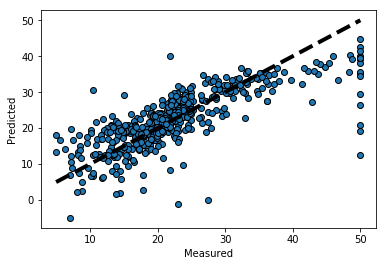

In [7]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In this tutorial we see how to use simple linear regression to predict house price. 